In [1]:
#end to end muliclass image classification

#weve just been thorugh a bunch of the following steps with binary classification

#become one with the data
#preprocess the data (get it ready for a model)
#create a model
#fit the model (iverfit it to make sure it works)
#adjust the different hyperparameters and improve the model
#repeat until satistified



In [4]:
#import and become one with the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2025-03-16 23:58:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  21.9MB/s    in 24s     

2025-03-16 23:59:16 (20.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [5]:
#unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


In [6]:
import os

#ealk though 10 classes of the data

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in 10_food_classes_all_data
There are 10 directories and 0 images in 10_food_classes_all_data/test
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak
There are 10 directories and 0 images in 10_fo

In [7]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Mar 16 23:59 .
drwxr-xr-x  1 root root 4096 Mar 16 23:59 ..
drwxr-xr-x 12 root root 4096 Mar 16 23:59 test
drwxr-xr-x 12 root root 4096 Mar 16 23:59 train


In [8]:
#set up train and test directoris
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [9]:
#lets get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [10]:
#visualize, visualize, visualize
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def view_random_image(target_dir, target_class = random.choice(class_names)):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image shape: {img.shape}")

  return img




image shape: (512, 512, 3)


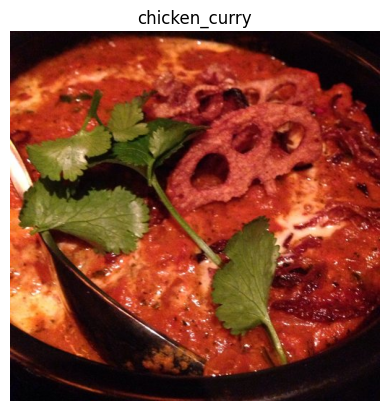

In [11]:
img = view_random_image("10_food_classes_all_data/train/")

In [12]:
#preprocessing the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#rescale the data
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

#load data into batches,
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224), #readjusts the size
                                               batch_size = 32,#creates the batches
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [13]:
###create a model (start with a baseline)

#we'll use the cnn expainer model on our 10 classes and see how it performs

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

#create our model

model_1= Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3),activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax") #changed to have 10 output neurons and use the softmax activation function
])

model_1.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 132ms/step - accuracy: 0.1552 - loss: 2.2858 - val_accuracy: 0.2808 - val_loss: 2.0578
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 113ms/step - accuracy: 0.2964 - loss: 1.9998 - val_accuracy: 0.3080 - val_loss: 1.9631
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 26s 111ms/step - accuracy: 0.4173 - loss: 1.7137 - val_accuracy: 0.3132 - val_loss: 1.9371
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.6210 - loss: 1.2314 - val_accuracy: 0.3144 - val_loss: 2.1574
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.8046 - loss: 0.6244 - val_accuracy: 0.2920 - val_loss: 2.8399


In [15]:
len(train_data)

235

In [16]:
#evaluate the model
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.2733 - loss: 2.8735


[2.8399150371551514, 0.2919999957084656]

In [19]:
#check out the model's loss curve on the 10 classes
import matplotlib.pyplot as plt
import pandas as pd
def plot_loss_curves(history):

  plt.figure()
  pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
  plt.xlabel("epochs")
  plt.title("loss")

  plt.figure
  pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
  plt.title("accuracy")



<Figure size 640x480 with 0 Axes>

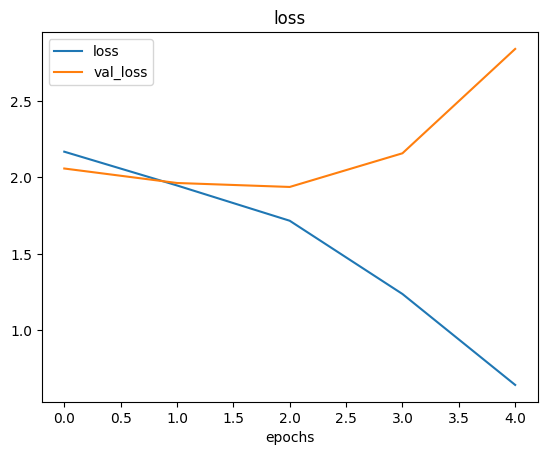

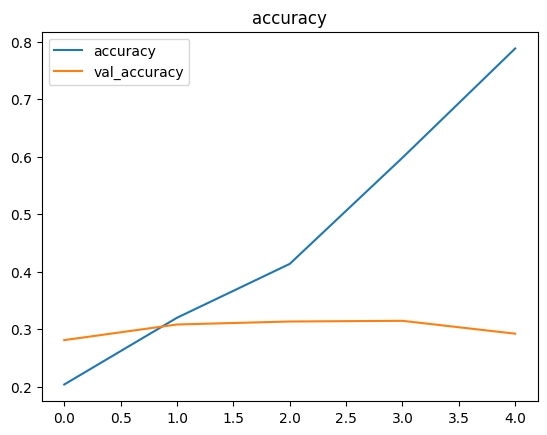

In [20]:
plot_loss_curves(history_1)

In [23]:
#what do these loss curves tell us?

#well.. it seems our model is overfitting the training set quite badly..(try to beat the baseline and reduce overfitting)

#repeat until satisfied

#our model is learning well on the training data but not generalizing well to the testing data
#either get more data, simplify the model (number of layers, or reduce hidden units in layers),
#data augmentation, use transfer learning

model_2 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])


model_2.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 29160)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │         291,610 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#fit the model with 2x conv layers removed
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - accuracy: 0.2047 - loss: 2.2063 - val_accuracy: 0.2968 - val_loss: 1.9313
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.4064 - loss: 1.7619 - val_accuracy: 0.3476 - val_loss: 1.8646
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 138ms/step - accuracy: 0.5932 - loss: 1.2958 - val_accuracy: 0.3628 - val_loss: 1.8719
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 131ms/step - accuracy: 0.7757 - loss: 0.7814 - val_accuracy: 0.3328 - val_loss: 2.1648
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 36s 110ms/step - accuracy: 0.9091 - loss: 0.3811 - val_accuracy: 0.3264 - val_loss: 2.5613


In [ ]:
plot_loss_curves(history_2) #this model is worse than the first model, not every experiment will work

In [37]:
#our simplifing model experiment didnt work how about we try data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             zoom_range = 0.2,
                                             shear_range = 0.2,
                                             horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size= (224, 224),
                                             batch_size= 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [38]:
model_3 = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3), activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

model_3.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │         280,910 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283,920 (1.08 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history_3 = model_3.fit(train_data_augmented, epochs = 5, steps_per_epoch=len(train_data_augmented), validation_data = test_data, validation_steps = len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 431ms/step - accuracy: 0.1750 - loss: 2.2269 - val_accuracy: 0.2996 - val_loss: 1.9818
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 427ms/step - accuracy: 0.2655 - loss: 2.0722 - val_accuracy: 0.3184 - val_loss: 1.9193
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 100s 425ms/step - accuracy: 0.3022 - loss: 2.0141 - val_accuracy: 0.3440 - val_loss: 1.8428
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 101s 430ms/step - accuracy: 0.3113 - loss: 1.9658 - val_accuracy: 0.3460 - val_loss: 1.8612
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 102s 433ms/step - accuracy: 0.3293 - loss: 1.9408 - val_accuracy: 0.3768 - val_loss: 1.8547


<Figure size 640x480 with 0 Axes>

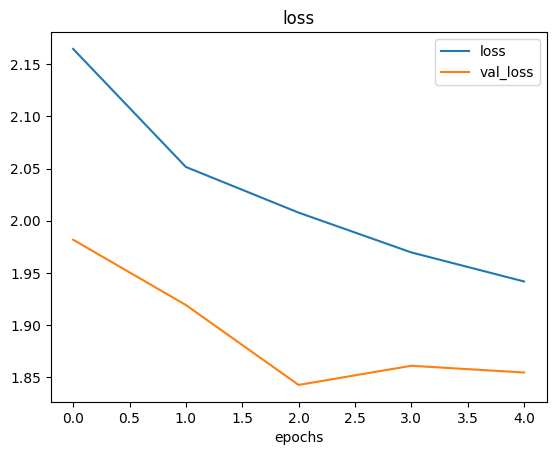

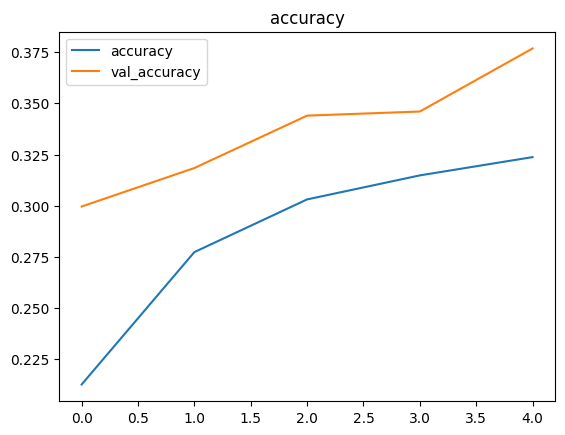

In [41]:
plot_loss_curves(history_3) #remember that augmented data takes a longer time to run because it augments data on the fly taking more compute time

In [ ]:
#much better loss curves if we were to train longer we might see further improvements

In [43]:
model_1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.2913 - loss: 2.8480


[2.8399155139923096, 0.2919999957084656]

In [44]:
model_3.evaluate(test_data) #augmented data was more accurate and overfit less

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.3767 - loss: 1.8646


[1.8547009229660034, 0.376800000667572]

In [42]:
#can use a function tf.keras.models.clone_model(model_1) would copy the exact model architecture with new weights and biases,
#then can go ahead and compile and fit the cloned model

In [ ]:
#repeat until satisfied

#restructure models architecture (increasing layers/hidden units)
#different methods of data augmentation (adjust hyper parameters)
#train for longer 10 epochs instead of 5 epochs
#change the activation function
#change the optimizatoin function

In [ ]:
#another thing we can do is utilize transfer learning

In [ ]:
#making a prediction with our trained model

In [45]:
class_names #here are the classes our model is trained on

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
#lets use our trained model to make some predictions on custom images

In [46]:
def load_and_prep_image(filename, img_shape = 224):
  """
  reads an image from filename. turns it into a tensor and reshapes
  it into (ing_shape, img_shape, img_color)

  """

  #read in the image
  img = tf.io.read_file(filename)

  #decode the read file into a tensor
  img = tf.image.decode_image(img)

  #resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  #rescale the image and get all values between 0 and 1
  img = img/255.

  return img

In [49]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  plots the image with the predicted class as the title

  """

  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis = 0))

  #add in logic for mutliclass & get pred class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


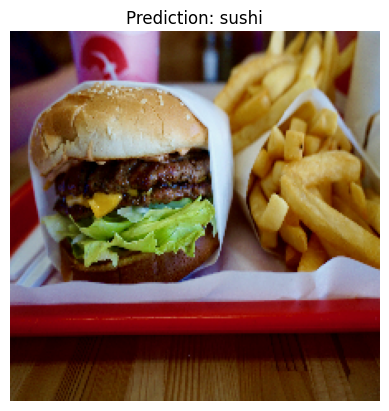

In [52]:
#reconfig pred and plot to work with multiclass images
pred_and_plot(model_3, filename = "/content/03-hamburger.jpeg")

In [ ]:
#got the wrong class on all, model is improving pretty poorly

In [ ]:
#looks like our model didnt perform very well on our custom images, this is beacuase it only achieved 39% accuracy on test data, so we can expect it to perform poorly on unseen data



save the model


In [53]:
model_3.save("saved_trained_model_3.keras")

In [54]:
loaded_model_3 = tf.keras.models.load_model("saved_trained_model_3.keras")

In [55]:
loaded_model_3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.3721 - loss: 1.8796


[1.8547011613845825, 0.376800000667572]